# Embedding 알아보기

In [1]:
import numpy as np

# 단어와 임베딩 벡터 정의

word_embeddings = {
    "귤": np.array([0, 6]),
    "딸기": np.array([0, 5]),
    "수박": np.array([1, 6]),
    "미소짓다": np.array([6, 1]),
    "화내다": np.array([6, 0]),
    "웃다": np.array([5, 0]),
}

# 단어와 임베딩 벡터 출력
print("단어와 임베딩 벡터 : ")
for word, vec in word_embeddings.items():
    print(f"{word}: {vec}")

단어와 임베딩 벡터 : 
귤: [0 6]
딸기: [0 5]
수박: [1 6]
미소짓다: [6 1]
화내다: [6 0]
웃다: [5 0]


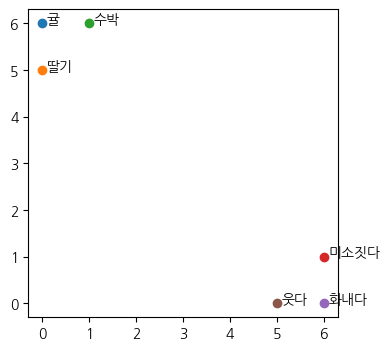

In [2]:
import matplotlib.pyplot as plt

# 단어 임베딩 시각화
plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word)
plt.show()

In [3]:
# 임베딩 된 두 단어 사이의 내적 구하기


def dot_product(vec1, vec2):
    return np.dot(vec1, vec2)


print("귤 * 딸기 :", dot_product(word_embeddings["귤"], word_embeddings["딸기"]))
print("귤 * 수박 :", dot_product(word_embeddings["귤"], word_embeddings["수박"]))
print("수박 * 웃다:", dot_product(word_embeddings["수박"], word_embeddings["웃다"]))
print("딸기 * 화내다 :", dot_product(word_embeddings["딸기"], word_embeddings["화내다"]))

귤 * 딸기 : 30
귤 * 수박 : 36
수박 * 웃다: 5
딸기 * 화내다 : 0


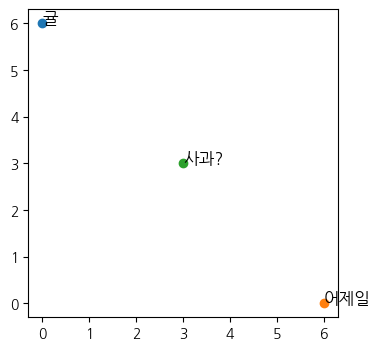

In [10]:
# 단어 사이의 관계 수정하기

# 귤, 어제일의 벡터값 설정
귤 = np.array([0, 6])
어제일 = np.array([6, 0])

# 사과의 초기 벡터값 설정
사과 = np.array([3, 3])

word_embeddings = {"귤": 귤, "어제일": 어제일, "사과?": 사과}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0], vec[1], word, fontsize=12)

plt.show()

In [12]:
# 학습을 통해서 사과의 의미를 파악하여 값을 변경

# 학습 이전의 단어들 사이의 내적 계산
print("귤 * 사과 :", dot_product(word_embeddings["귤"], word_embeddings["사과?"]))
print("어제일 * 사과 :", dot_product(word_embeddings["어제일"], word_embeddings["사과?"]))

# 실제는 학습한 결과 값이지만 예시 값을 임시로 사용
# 사과 벡터와 귤 과의 관계를 학습한 결과
attention_result1 = 0.6
# 사과 벡터와 어제일 과의 관게를 학습한 결과
attention_result2 = 0.45


# 단어 사이의 문맥을 파악하고 단어 간의 관계를 수정해 주는 역할을 함
# 벡터 업데이트 함수
def update_vector(vec, target_vec, attention_result):
    new_vector = vec + attention_result * (target_vec - vec)
    return new_vector


# 사과, 귤 사이의 거리 업데이트
사과_과일 = update_vector(사과, 귤, attention_result1)
print(f"업데이트된 사과 벡터 (사과_과일) : {사과_과일}")
# 사과, 어제일 사이의 거리 업데이트
사과_행동 = update_vector(사과, 어제일, attention_result2)
print(f"업데이트된 사과 벡터 (사과_행동) : {사과_행동}")

# 업데이트된 word_embeddings 설정
word_embeddings["사과_과일"] = 사과_과일
word_embeddings["사과_행동"] = 사과_행동

print("귤 * 사과_과일 :", dot_product(word_embeddings["귤"], word_embeddings["사과_과일"]))
print("어제일 * 사과_행동 :", dot_product(word_embeddings["어제일"], word_embeddings["사과_행동"]))

귤 * 사과 : 18
어제일 * 사과 : 18
업데이트된 사과 벡터 (사과_과일) : [1.2 4.8]
업데이트된 사과 벡터 (사과_행동) : [4.35 1.65]
귤 * 사과_과일 : 28.799999999999997
어제일 * 사과_행동 : 26.099999999999998


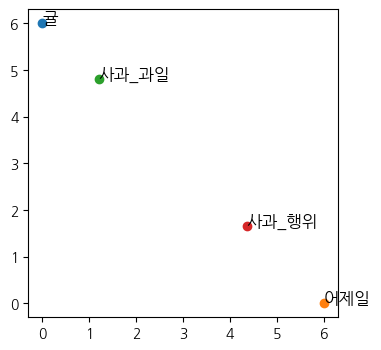

In [15]:
word_embeddings = {"귤": 귤, "어제일": 어제일, "사과_과일": 사과_과일, "사과_행위": 사과_행동}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0], vec[1], word, fontsize=12)

plt.show()